In [40]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [41]:
activity = pd.read_csv(os.path.join('andrew_data2.csv'))
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2850013230,Run,Hike,NaN,07.11.2019 16:46:32,16.8,Afternoon Run,42.1,0.458,92.08,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3022102505,3022102505,-28800,2019-11-07,NaN,https://www.strava.com/activities/2850013230
1,2895327719,Run,Hike,NaN,22.11.2019 17:05:04,17.1,Afternoon Run,20.1,0.234,85.91,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3077242534,3077242534,-28800,2019-11-22,NaN,https://www.strava.com/activities/2895327719
2,2832492215,Run,Hike,NaN,31.10.2019 15:41:16,15.7,Afternoon Run,62.1,0.870,71.53,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283821,3002283821,-25200,2019-10-31,NaN,https://www.strava.com/activities/2832492215
3,2832492192,Run,Hike,NaN,28.10.2019 15:17:05,15.3,Afternoon Run,42.1,0.686,61.27,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283809,3002283809,-25200,2019-10-28,NaN,https://www.strava.com/activities/2832492192
4,2877878037,Run,Hike,NaN,18.11.2019 16:00:16,16.0,Afternoon Run,52.1,0.907,57.47,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3055046850,3055046850,-28800,2019-11-18,NaN,https://www.strava.com/activities/2877878037


In [42]:
activity_clean = activity[["type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
activity_clean.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [43]:
data2 = activity_clean.dropna()
data2.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [44]:
y = data2["type_m"]
target_names = ["Elliptical", "Hike", "Run"]

In [45]:
X = data2.drop("type_m", axis=1)
X.head()

,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,16.8,42.1,127.2,161.0,42.3
1,17.1,20.1,114.8,148.0,43.0
2,15.7,62.1,118.6,156.0,43.5
3,15.3,42.1,125.4,156.0,46.7
4,16.0,52.1,137.4,154.0,44.7


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [48]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print('Test Acc: %.3f' % model.score(X_train_scaled, y_train))

Test Acc: 0.954


In [51]:
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.971


In [52]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  Elliptical       1.00      1.00      1.00        13
        Hike       0.83      0.91      0.87        11
         Run       0.99      0.97      0.98        78

    accuracy                           0.97       102
   macro avg       0.94      0.96      0.95       102
weighted avg       0.97      0.97      0.97       102



In [53]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 76]], dtype=int64)

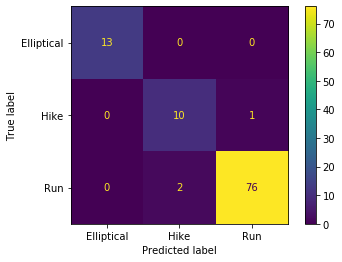

In [56]:
plot_confusion_matrix(model,X_test_scaled,y_test)